In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

(<matplotlib.image.AxesImage at 0x1c8e4332c40>, (1367, 1025, 3))

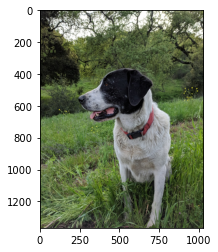

In [6]:
plt.imshow(full), full.shape

(<matplotlib.image.AxesImage at 0x1c8e42e4310>, (375, 486, 3))

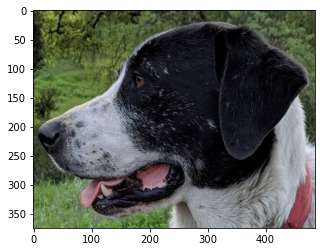

In [5]:
face = cv2.imread("sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face), face.shape

In [7]:
mystring = "sum"
eval(mystring)           # With Evaluate Function can be assign strings as function 
myfunc = eval(mystring)
myfunc([1, 2, 3])

6

In [8]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(<matplotlib.image.AxesImage at 0x1c8e4f37a60>,
 (-735641664.0, 1755028480.0, (0, 10), (231, 345)))

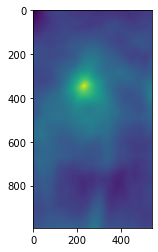

In [10]:
my_method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(full, face, my_method )
plt.imshow(res) , cv2.minMaxLoc(res)  #  min_val, max_val, min_loc, max_loc
# Heat map , Higher values higher correlation lighter than others.
# Heat Map Existed with original full image and only face image correlation.

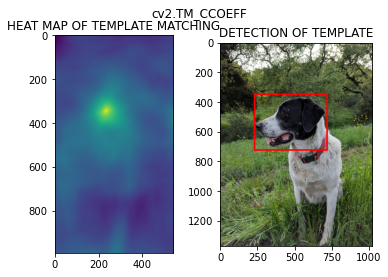

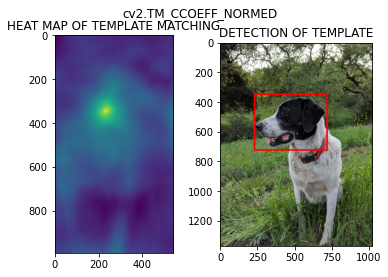

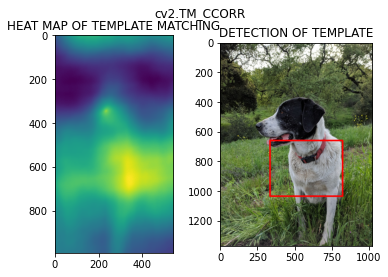

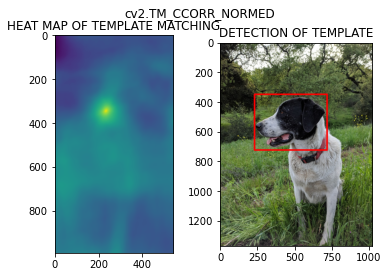

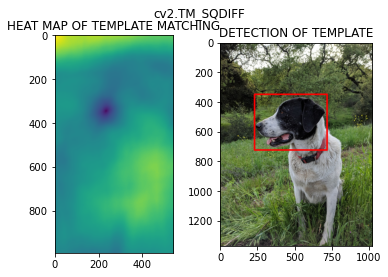

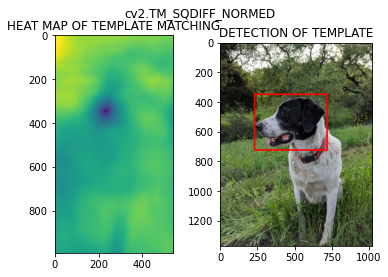

In [13]:
for m in methods:
    
    #Create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template Matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc        # We determine top Left point
        
    height , widht , channels = face.shape
    
    bottom_right = (top_left[0]+widht, top_left[1]+height) # We determine bottom right point.
                                           # And finally, we can assume as rectangle specific area.
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0 , 0), thickness=10)
    
    # PLOT AND SHOW THE IMAGES
    plt.subplot(121)  # 1xx Row x2x Column and Last xx1 is grap the first 
    plt.imshow(res)
    plt.title("HEAT MAP OF TEMPLATE MATCHING")
    
    plt.subplot(122)    # 1xx Row x2x Column and Last xx2 is grap the second 
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    plt.suptitle(m)       # TITLE WITH THE METHOD USED
    
    plt.show()      # Without these function images cannot show regularly
    print("\n")
    print("\n")